# Assigment 04: Due 9/30

You can use these imports

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit
import scipy.special as sf
%matplotlib notebook

# Problem 1a

Using Monte Carlo techniques discusses in *02_Integration_MC* notebook, solve the following integral and compare it to the exact solution:

$\int_0^2 \frac{2}{(2^2 + x^2)^{3/2}}dx$

In your Monte Carlo integration, use 10,000 random points.

In [96]:
xi= 0
xf = 2
n= 10000

exact = 0.3535

def f(x):
    return 2*((4+x**2)**(-1.5))

#f = lambda x : 2*((4+x**2)**(-1.5))
x = np.linspace(xi,xf,n)
y= f(x)

fmax = max(y)
print('fmax = ',fmax)

x_rand = xi + (xf - xi)*np.random.random(n) 
y_rand = np.random.random(n)*fmax

ung = np.where(y_rand < f(x_rand))
abg = np.where(y_rand >= f(x_rand))

ratio = float(len(ung[0])/n)
area = (xf-xi)*fmax
integral = ratio*area

print ("Area", area)
print ("Ratio", ratio)
print ("Exact Value",exact )
print ("Calculated Monte Carlo Integral", integral)

fmax =  0.25
Area 0.5
Ratio 0.703
Exact Value 0.3535
Calculated Monte Carlo Integral 0.3515


# 1b

Make a scatter plot of points below and above the integrand function. This is the some type of graph shown in the *02_Integration_MC* notebook with the blue and green points.

<IPython.core.display.Javascript object>


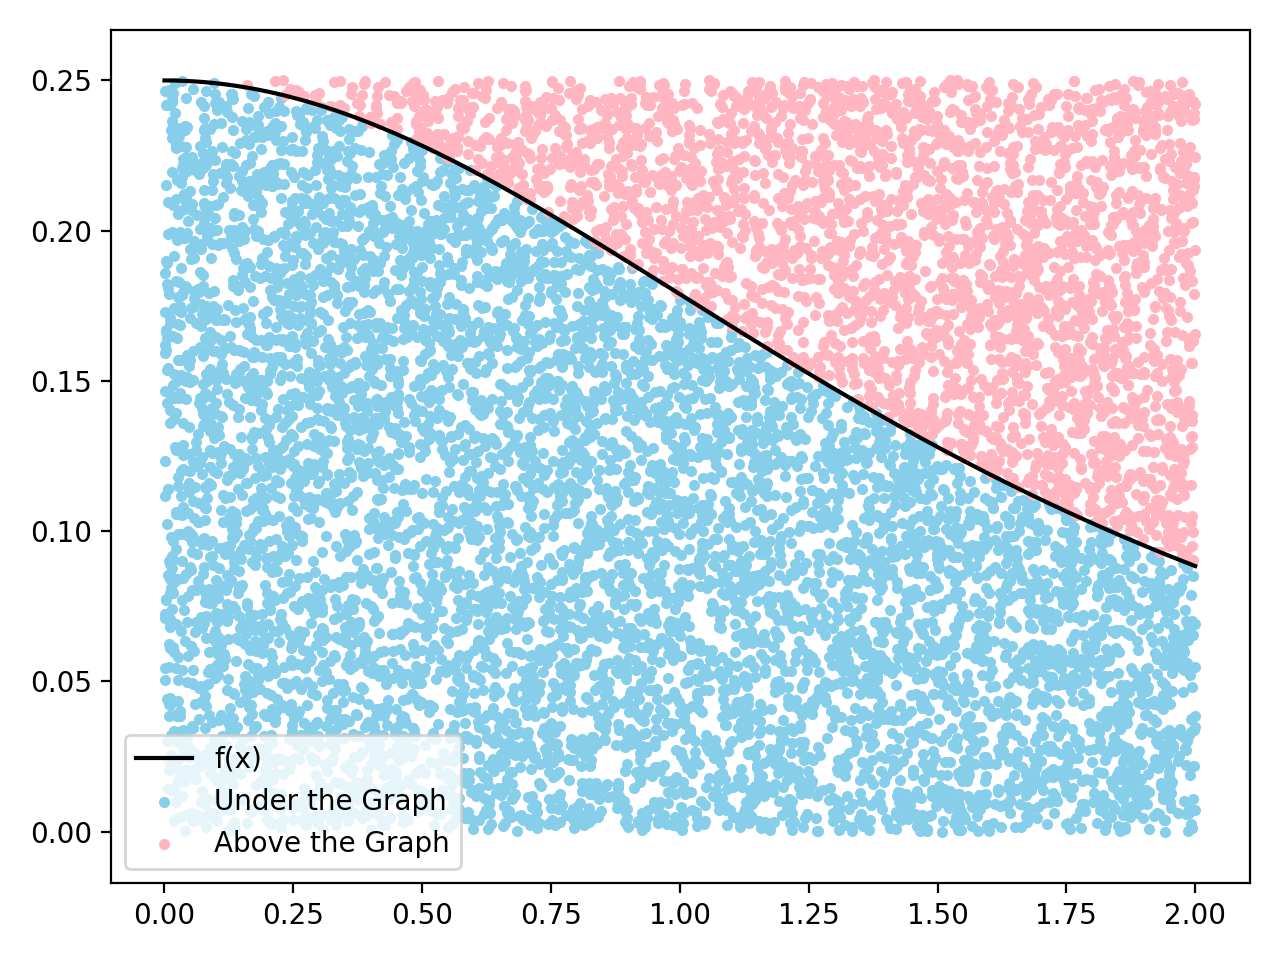

In [97]:
fig = plt.figure()
plt.scatter(x_rand[ung], y_rand[ung], color = "skyblue", marker = '.',label='Under the Graph')
plt.scatter(x_rand[abg], y_rand[abg], color = "lightpink", marker = '.', label = 'Above the Graph')
plt.plot(x, y, color = "black", label= 'f(x)')
plt.legend()
plt.tight_layout();

# Problem 2a
Read in the data set *./data/decay_data.txt*, this lists the time in days, number of particles, and the uncertianty on the particles. This is the same radio active decay data set used in our fitting example *Fitting_Lecture_Notes* from Module 2b.

Plot the data with its error bars.


<IPython.core.display.Javascript object>


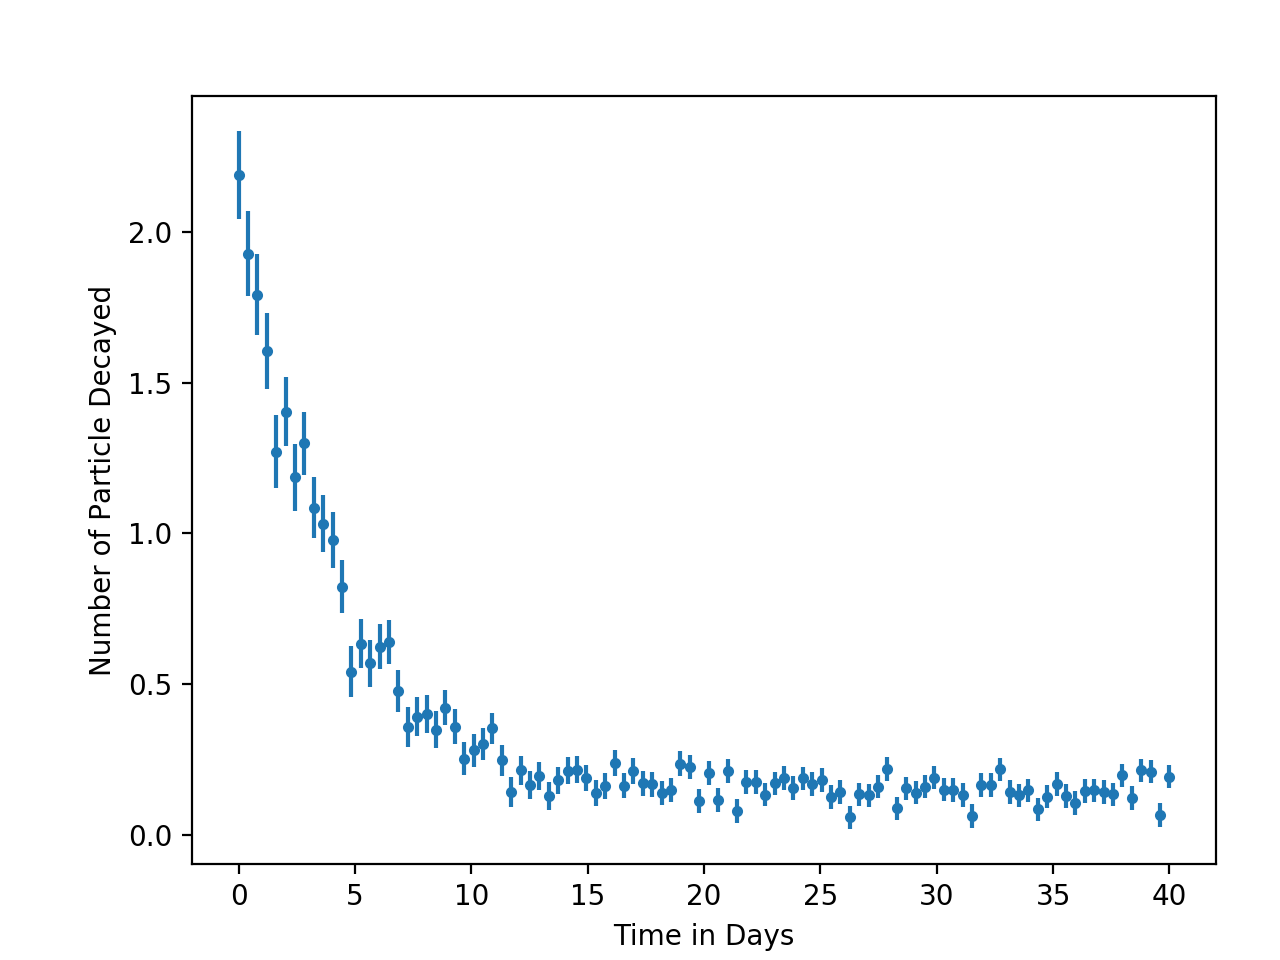

In [98]:
data = open ("/Users/tannishtha_nandi/Desktop/Physics Computing/Phys-3511-Fall2020-master/Module04/data/decay_data.txt", 'r')
t, N, un= np.loadtxt("/Users/tannishtha_nandi/Desktop/Physics Computing/Phys-3511-Fall2020-master/Module04/data/decay_data.txt", unpack=True)

fig = plt.figure("Particle Decay Plot")
axes = fig.add_axes([0.15,0.1,0.8,0.8])
axes.errorbar(t,N, yerr = un, fmt='.')
axes.set_xlabel('Time in Days')
axes.set_ylabel('Number of Particle Decayed');


# Problem 2b

Fit the data with 3 fit parameters using MCMC MH algorithm. You should take 10,000 steps and impliment the random test on $\chi ^2$, like we did our *03_MC_Fit* example notebook using the *get_chi_squared* function. For this we will use a function template of: $y = p_0 \cdot e^{-t/p_1} + p_2$,

where $p_0, p_1$, and $p_2$ are the fit parameters. When fitting you should choose starting values of $p_0 = p_1 = p_2 = 1.0$ to avoid nan errors.

In [99]:
def d(t,p0,p1,p2):
    return p0*(np.exp(-t/p1))+p2

def get_chi_squared(t, N, un,para):
    chisq = 0.0
    for i in range(len(t)):
        Nprime = (para[0]*(np.exp(-t[i]/para[1])))+para[2]
        chisq = chisq + ((N[i]-Nprime)/un[i])**2
    return chisq
np.random.seed(0)

In [100]:
initial = np.array([1.0,1.0,1.0])
para_list , chisqs = [initial], [get_chi_squared(t, N, un,initial)]

for i in range (n):
    test_para = [np.random.normal(para_list[-1][0],0.5),np.random.normal(para_list[-1][1],0.5),np.random.normal(para_list[-1][2],0.5)]
    chisqtest = get_chi_squared(t,N,un,test_para)
    r = (np.random.random() <= (chisqs[-1])/chisqtest)

    if r:
        para_list.append(test_para)
        chisqs.append(chisqtest)
    else:
        para_list.append(para_list[-1])
        chisqs.append(chisqs[-1])    
            
chisq_min = np.amin(chisqs) 
chisqf = chisq_min
best_i = chisqs.index(chisq_min) 
best_para = para_list[best_i]    

print('Best p0',best_para[0])
print('Best p1',best_para[1])
print('Best p3', best_para[2])
print('Chi Square', chisqf)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys


Best p0 1.8440466249516885
Best p1 4.021157571831759
Best p3 0.14147570359049408
Chi Square 110.80801059007894


# Problem 2c

What is the reduced $\chi^2$ of your fit and the p-value?
Is this a good fit?

In [101]:
dof = len(t) - len(initial) - 1
rchisq = chisqf/dof
pv = sf.gammaincc(dof/2.0, chisqf/2.0)

print ("Chisq", chisqf)
print('P Value', pv)
print("Reduced Chi Square", rchisq)
print("Degrees of Freedom", dof)
print("It's a good fit as p value is less than 5%")

Chisq 110.80801059007894
P Value 0.14326955957949192
Reduced Chi Square 1.1542501103133223
Degrees of Freedom 96
It's a good fit as p value is less than 5%


# Problem 2d

Plot on the same graph your data and the line showin the fitted function.

<IPython.core.display.Javascript object>


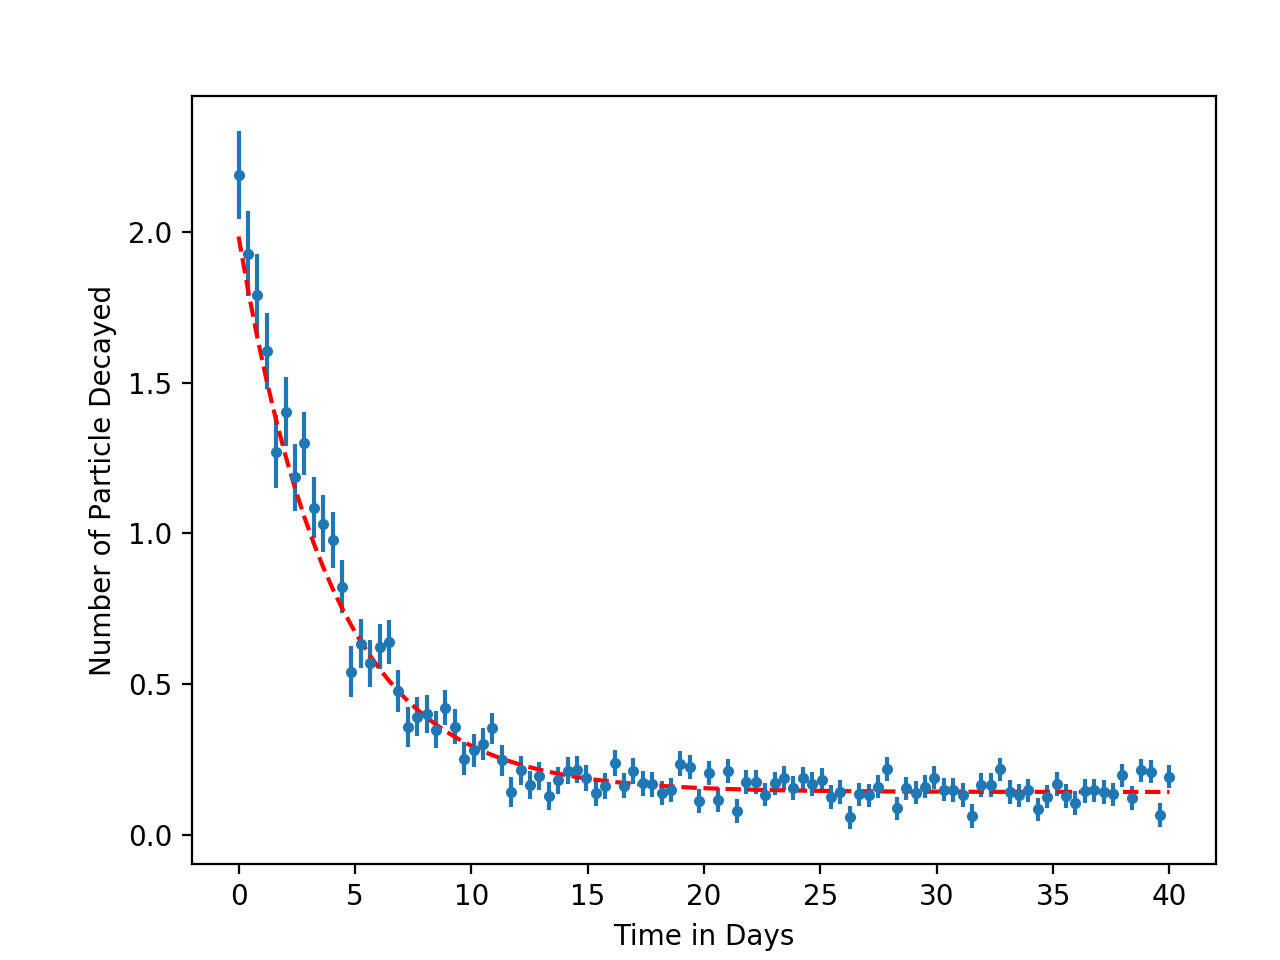

In [102]:
fig = plt.figure('Fitted Data Plot')
axes = fig.add_axes([0.15,0.1,0.8,0.8])
axes.errorbar(t,N, yerr = un, fmt='.')
axes.set_xlabel('Time in Days')
axes.set_ylabel('Number of Particle Decayed');
axes.plot(t,d(t,*best_para),'r--');


# Problem 2e

Plot the histogram distributions of the three fit parameters.

<IPython.core.display.Javascript object>


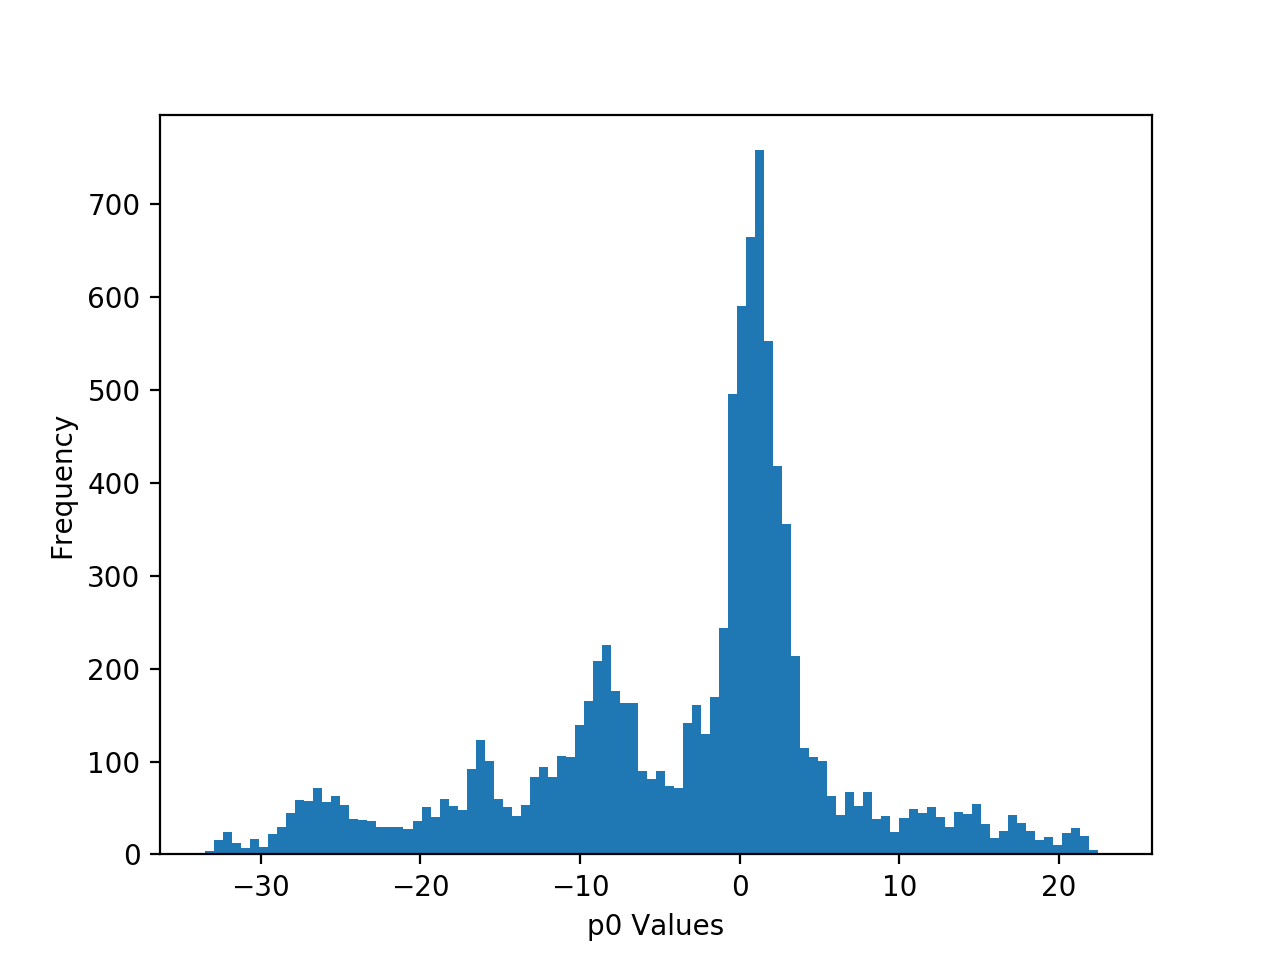

<IPython.core.display.Javascript object>


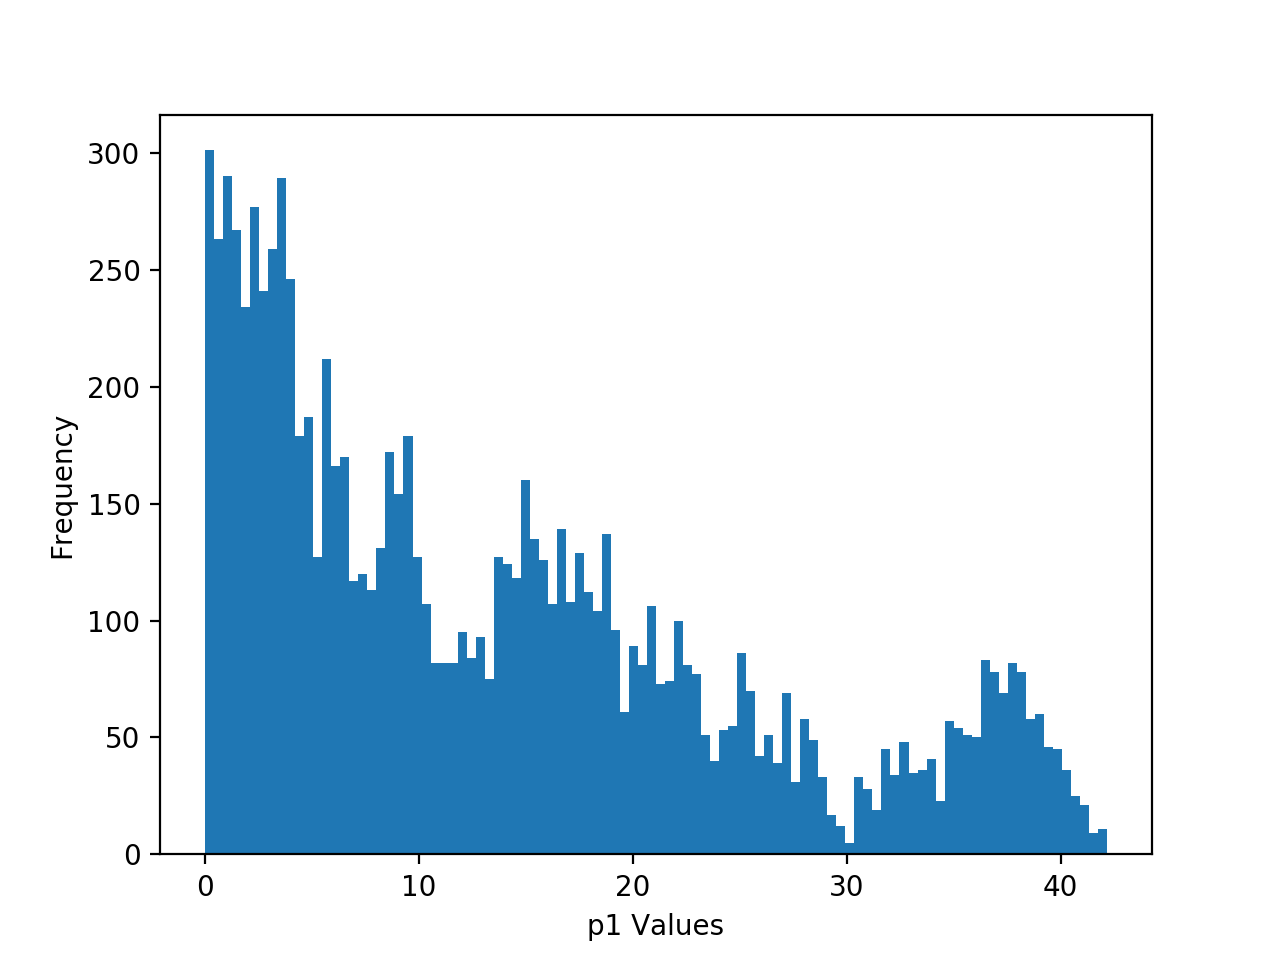

<IPython.core.display.Javascript object>


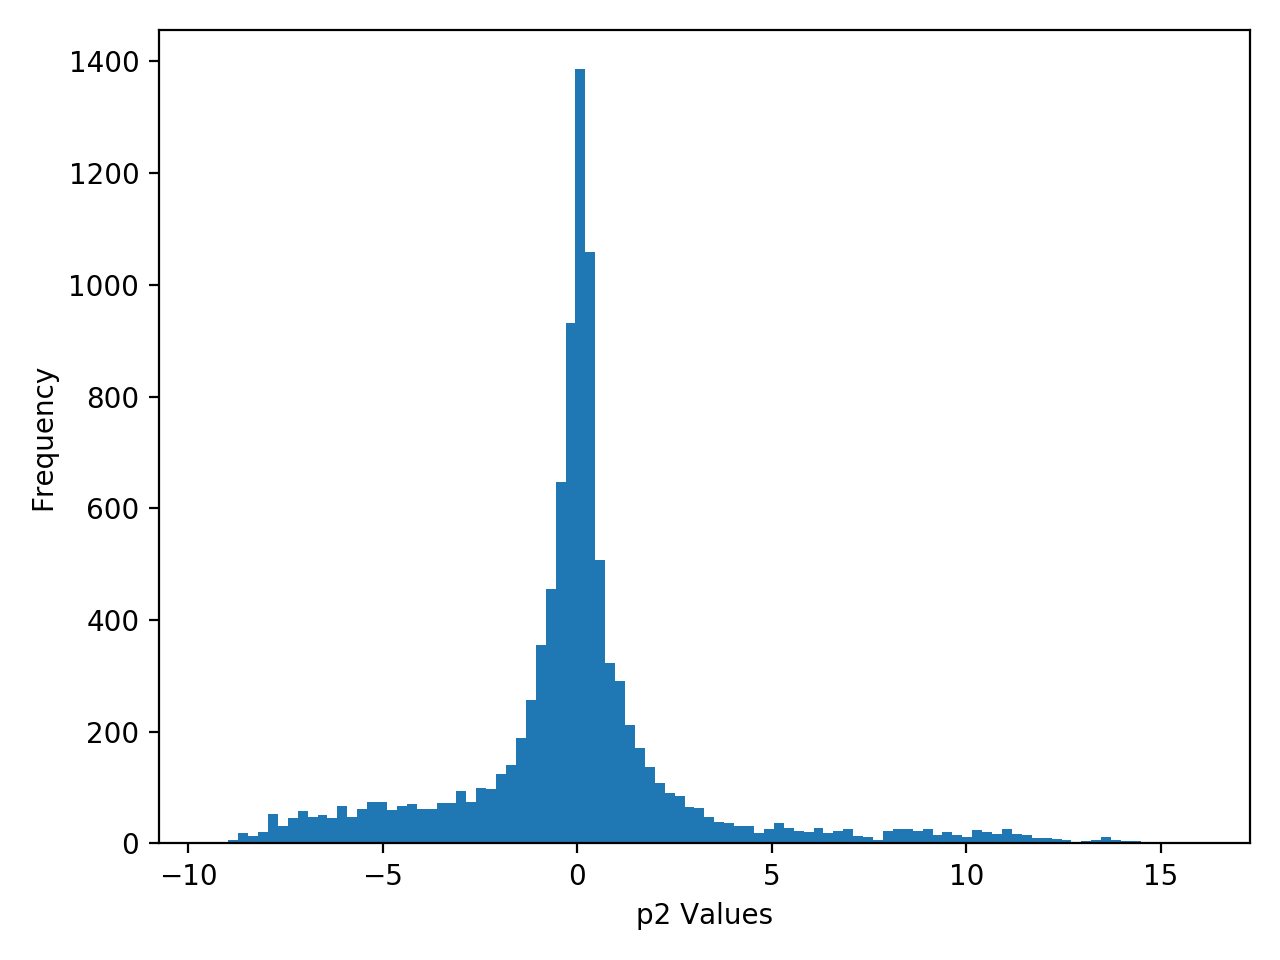

In [103]:
para_list=np.array(para_list)
#print(para_list[;,0])

fig1 = plt.figure("p0 Parameter")
plt.hist(para_list[:,0], bins=100)
plt.xlabel("p0 Values")
plt.ylabel("Frequency")

fig2=plt.figure("p1 Parameter")
plt.hist(para_list[:,1], bins=100)
plt.xlabel("p1 Values")
plt.ylabel("Frequency")

fig3=plt.figure("p2 Parameter")
plt.hist(para_list[:,2], bins=100)
plt.xlabel("p2 Values")
plt.ylabel("Frequency")

plt.tight_layout();